### Neshyba, 2022
# Cruising $S(T,P)$


## Learning Goals
1. Gain an intuition for the shape of $S(T,P)$, and its slopes, for solids, liquids, and gases.
1. Explain trends in $\Delta S_{vap}$ and $\Delta S_{fus}$ with respect to changes in temperature and pressure.

In [1]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d

In [2]:
%matplotlib notebook

### Lay out a T,P state space

In [3]:
# Lay out the state space
Tgrid, Pgrid_bar = PL.Statespace([200,400,100],[1,10,101])
Pgrid_bar = AssignQuantity(Pgrid_bar,'bar')
Pgrid = Pgrid_bar.to('pascal')
Tgrid = AssignQuantity(Tgrid,'K')

### Some general-purpose constants

In [4]:
# Gas constant in SI units
R = AssignQuantity(8.314,'J /mol/K')

# Standard state conditions, in SI units
T0 = AssignQuantity(298,'K')
P0 = AssignQuantity(1e5,'pascal')

### Constants pertaining to water
The following cell provides constants for three phases of water - See https://webbook.nist.gov/chemistry/name-ser/ for standard-state entropy values.

In [5]:
# Some SI units related to entropy
EUnits = 'J/K/mol'
dSdTUnits = 'J / kelvin^2 /mole'
dSdPUnits = 'meter ** 3 / kelvin / mole'

# Molar mass of water
M = AssignQuantity(.018,'kg/mol')

# Parameters for gaseous water
CP_gas = AssignQuantity(33.6,EUnits)
SS_gas = [T0,P0,AssignQuantity(188.835,EUnits)] # Specifying the standard state entropy

# Parameters for liquid water
Vgrid_liq = AssignQuantity(0.018,'m^3 /mol')*np.ones(np.shape(Pgrid)) # Molar volume, as a state-space grid
alpha_P_liq = AssignQuantity(2.1e-4,'1/K') # Thermal expansivity
CP_liq = AssignQuantity(75.4,EUnits) # Heat capacity
SS_liq = [T0,P0,AssignQuantity(69.95,EUnits)]

# Parameters for ice water
Vgrid_sol = 1.1*Vgrid_liq # 10% of icebergs are above the water
alpha_P_sol = AssignQuantity(0.5e-4,'1/K') 
CP_sol = AssignQuantity(38,EUnits)
SS_sol = [T0,P0,AssignQuantity(46.5,EUnits)]

### Visualizing $\big (\partial S/ \partial T \big )_P$ 
Below, we calculate and display $\big (\partial S/ \partial T \big )_P = \frac {C_P}T$, for water in the form of a gas, liquid, and solid.

<IPython.core.display.Javascript object>


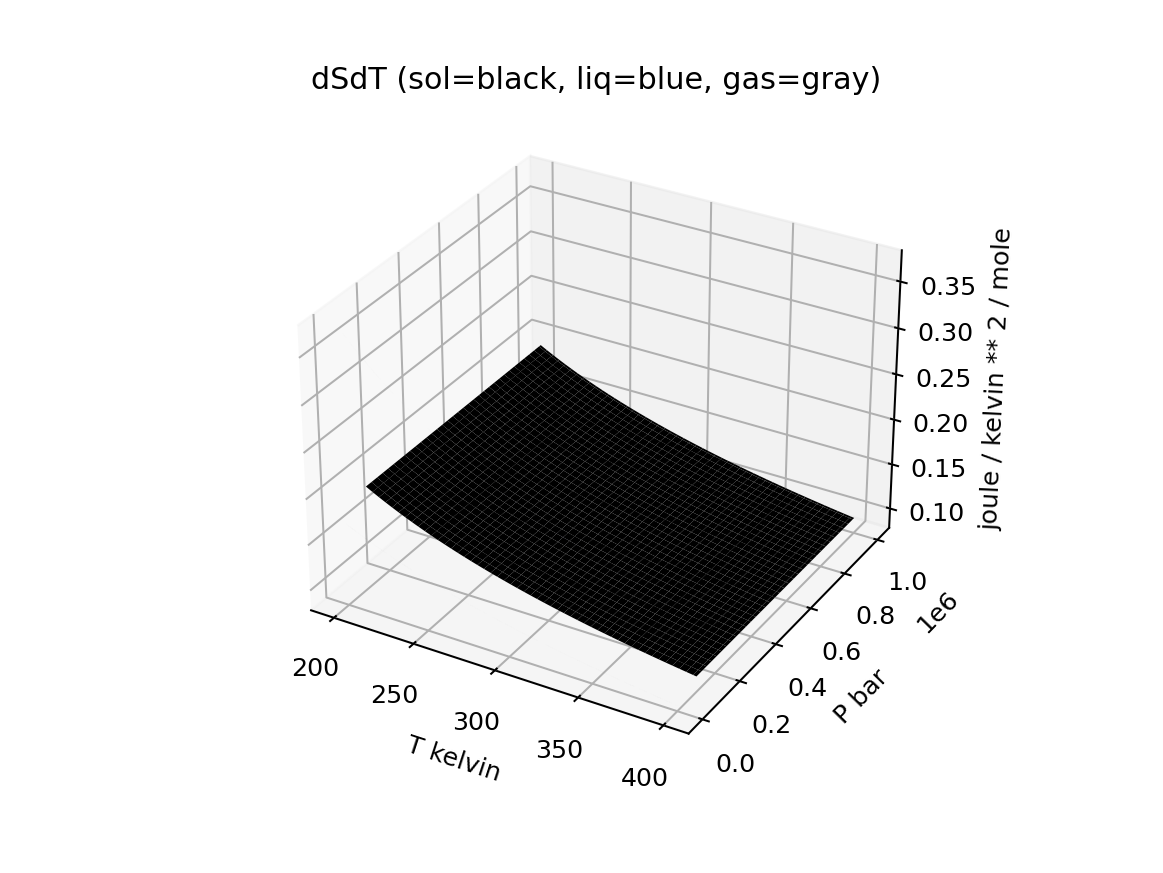

Text(0.5, 0.92, 'dSdT (sol=black, liq=blue, gas=gray)')

In [6]:
# dSdT for the gas
dSdT_gas = CP_gas/Tgrid

# dSdT for the liquid
dSdT_liq = CP_liq/Tgrid

# dSdT for the solid
dSdT_sol = CP_sol/Tgrid

# Graphics
xlabel = "T "+str(Tgrid.units)
ylabel = "P "+str(Pgrid_bar.units)
ax = PL.plot_surface(Tgrid, Pgrid, dSdT_sol, color='black')
PL.plot_surface(Tgrid, Pgrid_bar, dSdT_liq, color='blue',overlay=True,ax=ax)
PL.plot_surface(Tgrid, Pgrid_bar, dSdT_gas, color='gray',overlay=True,ax=ax)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(dSdT_liq.units))
ax.set_title('dSdT (sol=black, liq=blue, gas=gray)')

### Pause for analysis
The liquid has values that are a lot bigger than the gas or the solid! (This is is important because it means the we should expect the entropy of the liquid to be a lot more temperature-dependent than the gas.) There's a reason for this that you can trace back to heat capacities. Enter your thinking along these lines in the cell below.

### Visualizing $\big (\partial S/ \partial P \big )_T$

- For the gas, we think $\big (\partial S/ \partial P \big )_T = -R/P$ is a good approximation.
- For the liquid, we think $\big (\partial S/ \partial P \big )_T = -V_{liq} \times \alpha_{P,liq}$, where $V_{liq}$ and $\alpha_{P,liq}$ are constants. 
- For the solid, we think $\big (\partial S/ \partial P \big )_T = -V_{sol} \times \alpha_{P,sol}$, where $V_{sol}$ and $\alpha_{P,sol}$ are constants. 

All these quantities, as written, are on a per-mole basis, according to the constants we've set up above. In the cell below, we calculate and plot all three.

<IPython.core.display.Javascript object>


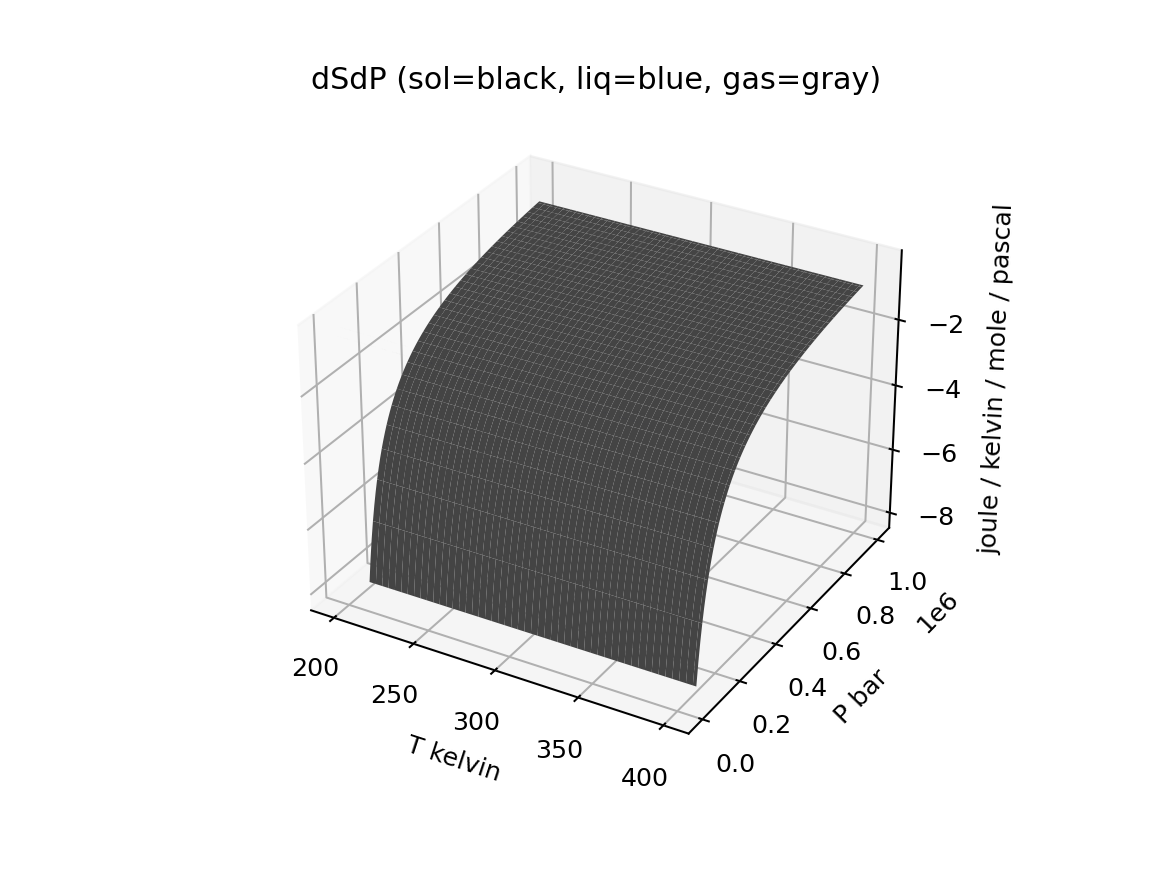

Text(0.5, 0.92, 'dSdP (sol=black, liq=blue, gas=gray)')

In [7]:
# dSdP
dSdP_gas = -R/Pgrid
dSdP_liq = -Vgrid_liq*alpha_P_liq
dSdP_sol = -Vgrid_sol*alpha_P_sol

xlabel = "T "+str(Tgrid.units)
ylabel = "P "+str(Pgrid_bar.units)
ax = PL.plot_surface(Tgrid, Pgrid, dSdP_gas*1e5, color='gray')
PL.plot_surface(Tgrid, Pgrid_bar, dSdP_liq*1e5, color='blue',overlay=True,ax=ax)
PL.plot_surface(Tgrid, Pgrid_bar, dSdP_sol*1e5, color='black',overlay=True,ax=ax)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(dSdP_gas.units))

# Display a title
ax.set_title('dSdP (sol=black, liq=blue, gas=gray)')

### Pause for analysis
OK, you've probably noticed that $\big (\partial S/ \partial P \big )_T$ for liquid and solid are almost identical (on this scale, anyway), but vastly different from the gas. What's the reason for that?

### Visualizing $S(T,P)$
Below, we show how to use a new state-space integrator function, called PL.Integrator, to calculate and display the entropy of water in its three phases, with offsets according to standard-state entropy tables (see https://webbook.nist.gov/chemistry/name-ser/).

Assigning units: J/K/mol
Assigning units: J/K/mol
Assigning units: J/K/mol


/home/instructor/pchem/source/Week_10a.CruisingSTP/PchemLibrary.py:136: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  Fgrid[i,:] = integral_along_y
/home/instructor/.local/lib/python3.10/site-packages/scipy/interpolate/_fitpack2.py:1327: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  z = np.asarray(z)
/home/instructor/.local/lib/python3.10/site-packages/scipy/interpolate/_fitpack2.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  nx, tx, ny, ty, c, fp, ier = dfitpack.regrid_smth(x, y, z, xb, xe, yb,
/home/instructor/.local/lib/python3.10/site-packages/scipy/interpolate/_fitpack2.py:897: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.asarray(x)
/home/instructor/.local/lib/python3.10/site-packages/scipy/interpolate/_fitpack2.py:898: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to

<IPython.core.display.Javascript object>


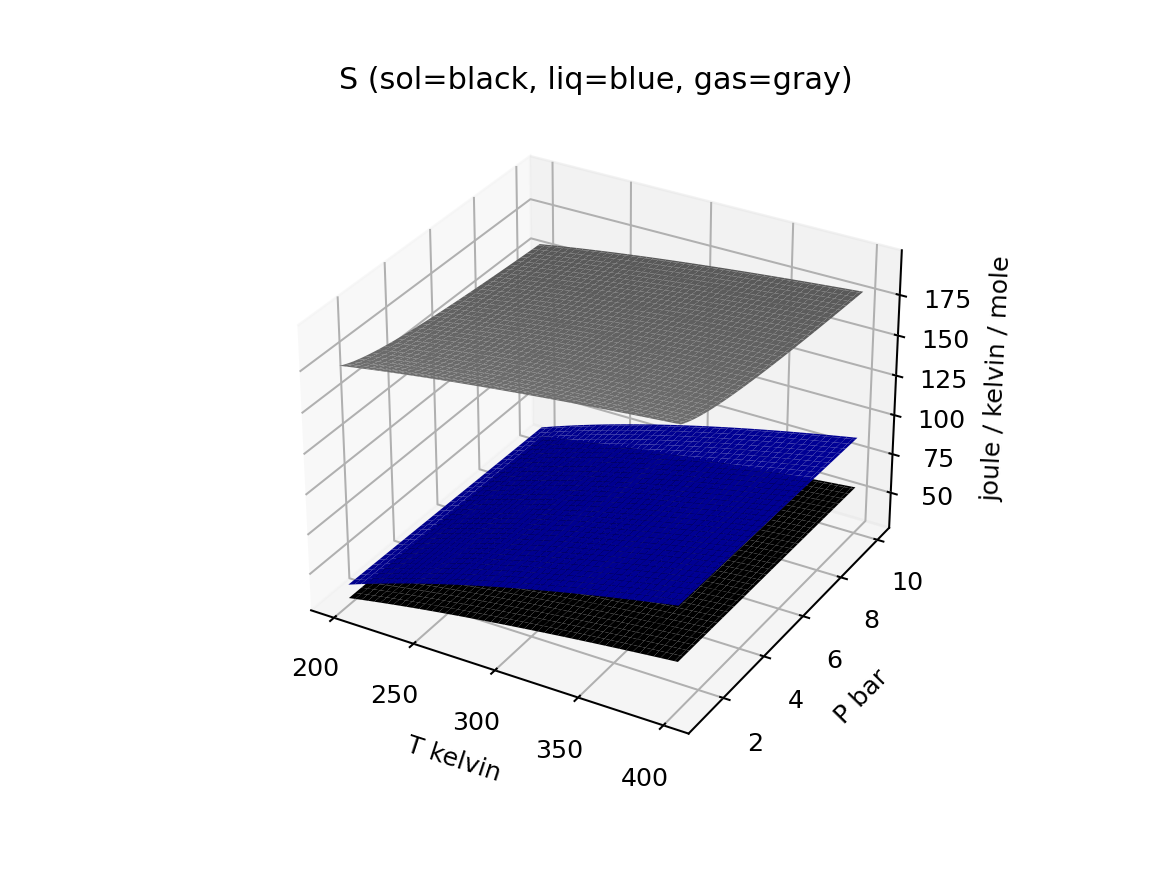

<IPython.core.display.Javascript object>


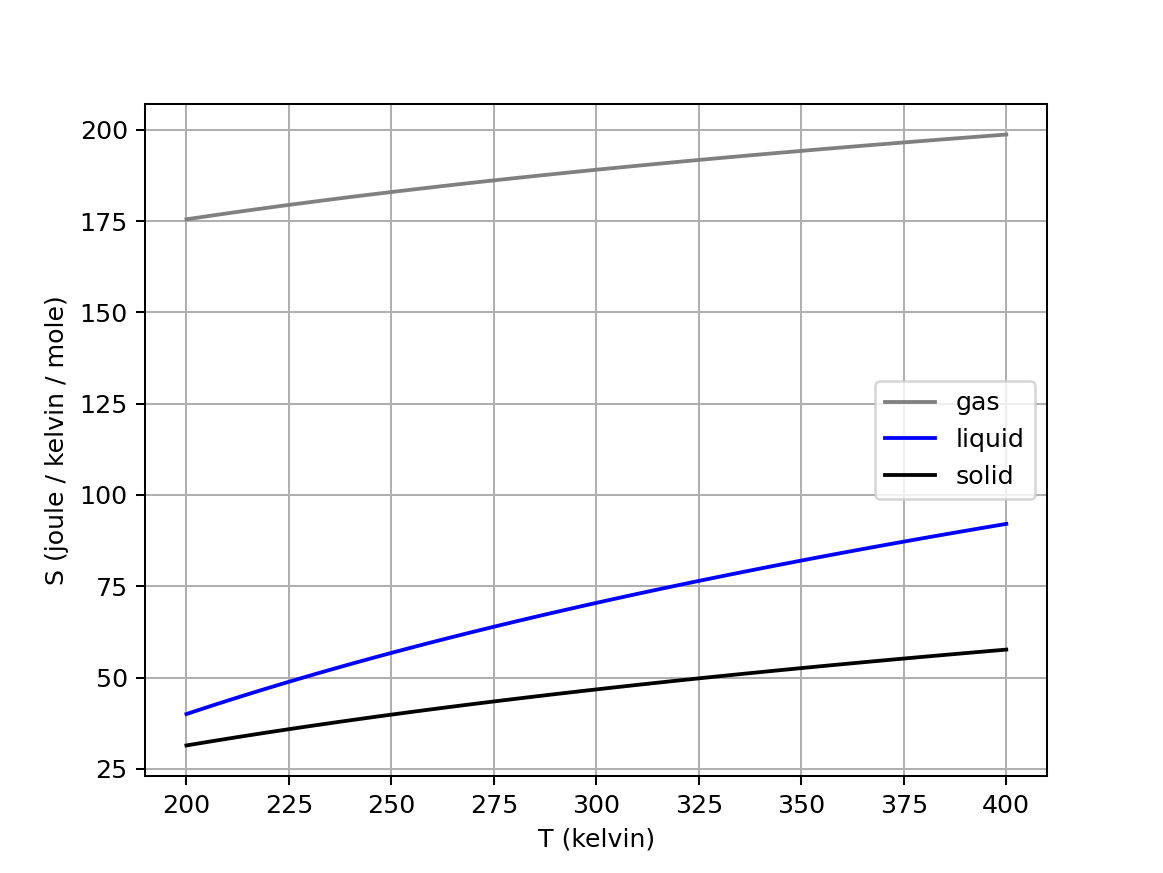

1.0 bar


/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


<IPython.core.display.Javascript object>


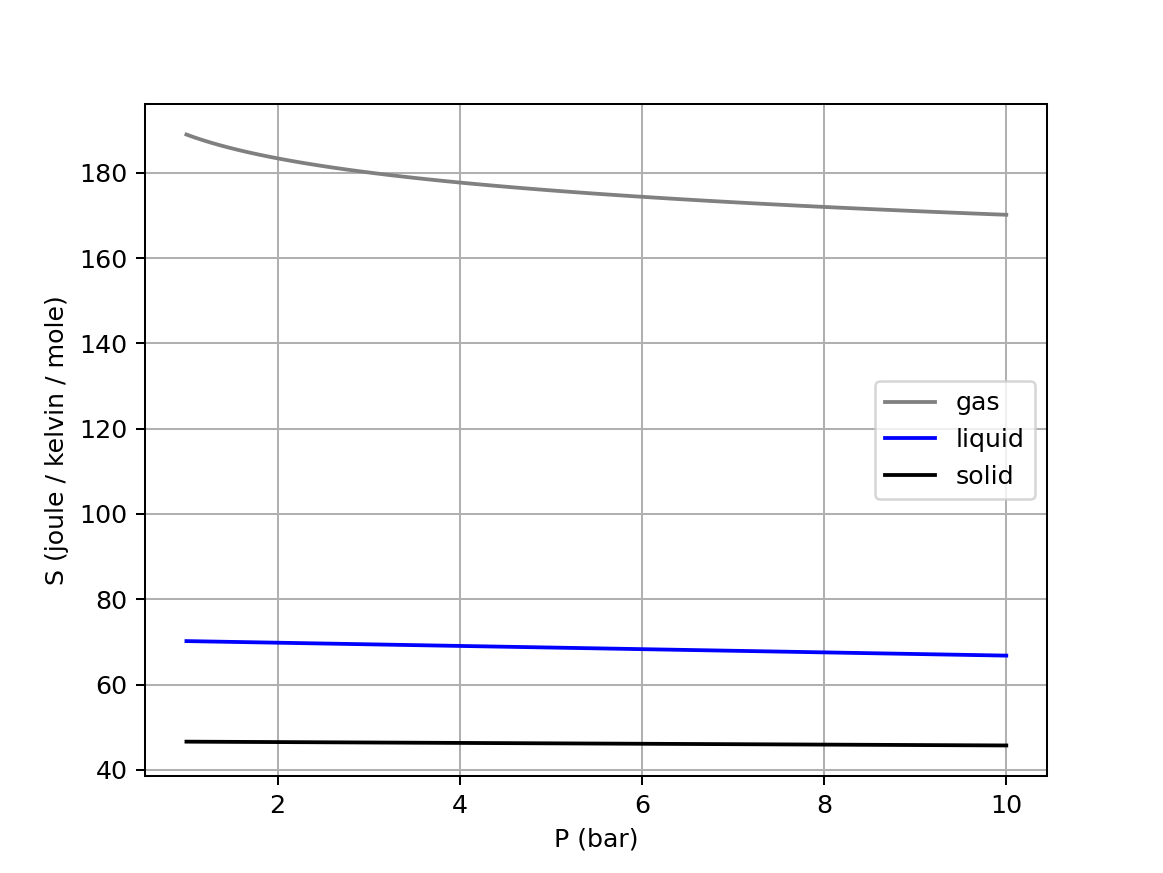

298.98989898989896 kelvin


/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Text(0, 0.5, 'S (joule / kelvin / mole)')

In [22]:
# Calculate the entropies as thermodynamic surfaces
S_gas = PL.Integrator([Tgrid, Pgrid], dSdT_gas, dSdP_gas, AssignQuantity, Units=EUnits, SState=SS_gas)
S_liq = PL.Integrator([Tgrid, Pgrid], dSdT_liq, dSdP_liq, AssignQuantity, Units=EUnits, SState=SS_liq)
S_sol = PL.Integrator([Tgrid, Pgrid], dSdT_sol, dSdP_sol, AssignQuantity, Units=EUnits, SState=SS_sol)

# Graphing all three
xlabel = "T "+str(Tgrid.units)
ylabel = "P "+str(Pgrid_bar.units)
ax = PL.plot_surface(Tgrid, Pgrid_bar, S_gas, color='gray')
PL.plot_surface(Tgrid, Pgrid_bar, S_liq, color='blue',overlay=True,ax=ax)
PL.plot_surface(Tgrid, Pgrid_bar, S_sol, color='black',overlay=True,ax=ax)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(str(S_gas.units))
ax.set_title('S (sol=black, liq=blue, gas=gray)')

# Graphing slices
plt.figure('Isobars')
isobar = 0 # This corresponds to about 1 bar
print(Pgrid_bar[0,isobar])
plt.plot(Tgrid[:,isobar],S_gas[:,isobar], color='gray', label='gas')
plt.plot(Tgrid[:,isobar],S_liq[:,isobar], color='blue', label='liquid')
plt.plot(Tgrid[:,isobar],S_sol[:,isobar], color='black', label='solid')
plt.grid(True)
plt.legend()
plt.xlabel('T ('+str(Tgrid.units)+')')
plt.ylabel('S (' + str(S_gas.units) + ')')

# Graphing slices
plt.figure('Isotherms')
isotherm = 49 # This corresponds to about 298 K
print(Tgrid[isotherm,0])
plt.plot(Pgrid_bar[isotherm,:],S_gas[isotherm,:], color='gray', label='gas')
plt.plot(Pgrid_bar[isotherm,:],S_liq[isotherm,:], color='blue', label='liquid')
plt.plot(Pgrid_bar[isotherm,:],S_sol[isotherm,:], color='black', label='solid')
plt.grid(True)
plt.legend()
plt.xlabel("P ("+str(Pgrid_bar.units) + ')')
plt.ylabel('S (' + str(S_gas.units) + ')')

### Pause for analysis
Take a moment to sketch this figure in your physical notebook, then enter your thinking about the following:

1. About $\Delta S_{vap}$ ... 
- Is it getting bigger or smaller with increasing temperature? What's the underlying reason for this?
- Is it getting bigger or smaller with increasing pressuyre? What's the underlying reason for this?

2. About  $\Delta S_{fus}$ ... 
- Is it getting bigger or smaller with increasing temperature? What's the underlying reason for this?
- Is it getting bigger or smaller with increasing pressuyre? What's the underlying reason for this?

### Refresh/save/validate/close/submit/logout